# Prices retrieved from Azure Sentinel, Azure Monitor and Azure Calculator

Source: https://azure.microsoft.com/en-us/pricing/details/azure-sentinel/ **PAY ATTENTION TO LOCATION EUROPE WEST!!**

In [1]:
#LOCATION: EUROPE WEST
price_onlysentinel_payasyougo = 2.20
price_onlysentinel_3t_reservation = 109.63/100
price_onlysentinel_6t_reservation = 197.34/200
price_onlysentinel_9t_reservation = 285.04/300
price_onlysentinel_12t_reservation = 365.43/400
price_onlysentinel_15t_reservation = 438.52/500

https://azure.microsoft.com/en-us/pricing/details/monitor/ **PAY ATTENTION TO LOCATION EUROPE WEST!!**

In [2]:
#LOCATION: EUROPE WEST
price_only_LA_lower5G_payasyougo = 0
price_only_LA_payasyougo = 2.522
price_only_LA_3t_reservation = 213.22/100
price_only_LA_6t_reservation = 400.34/200
price_only_LA_9t_reservation = 587.45/300
price_only_LA_12t_reservation = 765.86/400
price_only_LA_15t_reservation = 941.00/500

https://azure.microsoft.com/en-us/pricing/calculator/ 

In [3]:
price_payasyougo = 4.29
price_3t_reservation = 3.23
price_6t_reservation = 2.99
price_9t_reservation = 2.91

# Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # http://matplotlib.org/gallery.html 
plt.style.use('ggplot') # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline 

# Initiating a long list with 'GB'

In [5]:
df = pd.Series(range(1,15000)).to_frame('GB')

# Considering values from Azure Calculator

In [6]:
df['azurecalculator_payasyougo'] = df['GB'] * price_payasyougo
df['azurecalculator_3t_reservation'] = df['GB'].apply(lambda x: price_3t_reservation*3000 if x<=3000 else (price_3t_reservation*3000) + (x-3000)* price_payasyougo)
df['azurecalculator_6t_reservation'] = df['GB'].apply(lambda x: price_6t_reservation*6000 if x<=6000 else (price_6t_reservation*6000) + (x-6000)* price_payasyougo)
df['azurecalculator_9t_reservation'] = df['GB'].apply(lambda x: price_9t_reservation*9000 if x<=9000 else (price_9t_reservation*9000) + (x-9000)* price_payasyougo)

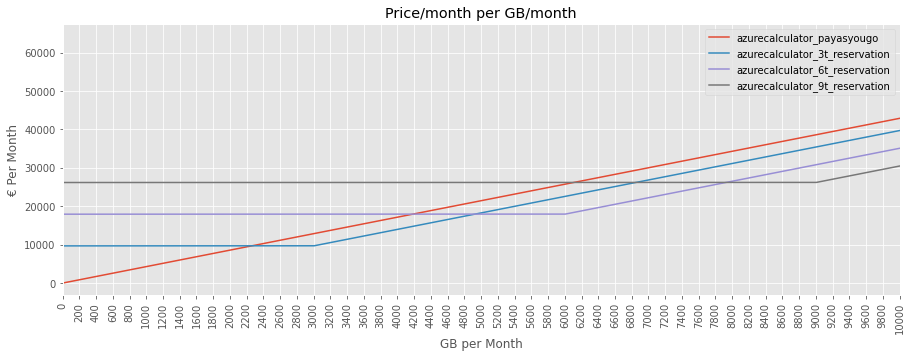

In [7]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_title('Price/month per GB/month')

df.plot(ax=ax,x='GB',y=['azurecalculator_payasyougo',
                        'azurecalculator_3t_reservation',
                        'azurecalculator_6t_reservation',
                        'azurecalculator_9t_reservation'])

plt.xticks(np.arange(0, max(df['GB'])+200, 200),rotation='vertical')
ax.set_xlim(0,10000)
ax.set_ylabel("€ Per Month")
ax.set_xlabel("GB per Month")

plt.show()

In [8]:
df['azurecalculator_payasyougo_MIN_azurecalculator_3t']=abs(df['azurecalculator_payasyougo']- df['azurecalculator_3t_reservation'])
df['azurecalculator_3t_MIN_azurecalculator_6t']=abs(df['azurecalculator_3t_reservation']- df['azurecalculator_6t_reservation'])
df['azurecalculator_6t_MIN_azurecalculator_9t']=abs(df['azurecalculator_6t_reservation']- df['azurecalculator_9t_reservation'])

gb_month_azurecalculator_3t = df[df['azurecalculator_payasyougo_MIN_azurecalculator_3t'] == df['azurecalculator_payasyougo_MIN_azurecalculator_3t'].min()]['GB'].values[0]
gb_month_azurecalculator_6t = df[df['azurecalculator_3t_MIN_azurecalculator_6t'] == df['azurecalculator_3t_MIN_azurecalculator_6t'].min()]['GB'].values[0]
gb_month_azurecalculator_9t = df[df['azurecalculator_6t_MIN_azurecalculator_9t'] == df['azurecalculator_6t_MIN_azurecalculator_9t'].min()]['GB'].values[0]

print("The intersection points for Azure Calculator are:",
      gb_month_azurecalculator_3t,",",
      gb_month_azurecalculator_6t,"and",
      gb_month_azurecalculator_9t,"GB/month")

The intersection points for Azure Calculator are: 2259 , 4923 and 7923 GB/month


# Considering values from Azure Sentinel

In [9]:
df['only_sentinel_payasyougo'] = df['GB']*price_onlysentinel_payasyougo
df['only_sentinel_3t_reservation'] = df['GB'].apply(lambda x: price_onlysentinel_3t_reservation*3000 if x<=3000 else (price_onlysentinel_3t_reservation*3000) + (x-3000)* price_onlysentinel_payasyougo)
df['only_sentinel_6t_reservation'] = df['GB'].apply(lambda x: price_onlysentinel_6t_reservation*6000 if x<=6000 else (price_onlysentinel_6t_reservation*6000) + (x-6000)* price_onlysentinel_payasyougo)
df['only_sentinel_9t_reservation'] = df['GB'].apply(lambda x: price_onlysentinel_9t_reservation*9000 if x<=9000 else (price_onlysentinel_9t_reservation*9000) + (x-9000)* price_onlysentinel_payasyougo)
df['only_sentinel_12t_reservation'] = df['GB'].apply(lambda x: price_onlysentinel_12t_reservation*12000 if x<=12000 else (price_onlysentinel_12t_reservation*12000) + (x-12000)* price_onlysentinel_payasyougo)
df['only_sentinel_15t_reservation'] = df['GB'].apply(lambda x: price_onlysentinel_15t_reservation*15000 if x<=15000 else (price_onlysentinel_15t_reservation*15000) + (x-15000)* price_onlysentinel_payasyougo)

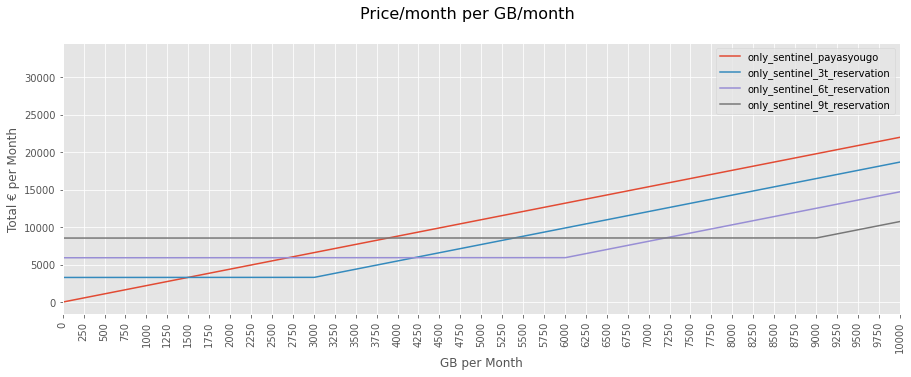

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))

fig.suptitle('Price/month per GB/month', fontsize=16)

df.plot(ax=ax,x='GB',y=['only_sentinel_payasyougo',
                        'only_sentinel_3t_reservation',
                        'only_sentinel_6t_reservation',
                        'only_sentinel_9t_reservation'])


ax.set_xticks(np.arange(0, 10000+250, 250))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_xlim(0,10000)
ax.set_ylabel("Total € per Month")
ax.set_xlabel("GB per Month")

plt.show()

# What are the intersection points for Sentinel?

In [11]:
df['sentinel_payasyougo_MIN_sentinel_3t']=abs(df['only_sentinel_payasyougo']- df['only_sentinel_3t_reservation'])
df['sentinel_3t_MIN_sentinel_6t']=abs(df['only_sentinel_3t_reservation']- df['only_sentinel_6t_reservation'])
df['sentinel_6t_MIN_sentinel_9t']=abs(df['only_sentinel_6t_reservation']- df['only_sentinel_9t_reservation'])

gb_month_sentinel_3t = df[df['sentinel_payasyougo_MIN_sentinel_3t'] == df['sentinel_payasyougo_MIN_sentinel_3t'].min()]['GB'].values[0]
gb_month_sentinel_6t = df[df['sentinel_3t_MIN_sentinel_6t'] == df['sentinel_3t_MIN_sentinel_6t'].min()]['GB'].values[0]
gb_month_sentinel_9t = df[df['sentinel_6t_MIN_sentinel_9t'] == df['sentinel_6t_MIN_sentinel_9t'].min()]['GB'].values[0]

print("The intersection points for Sentinel are:",
      gb_month_sentinel_3t,",",
      gb_month_sentinel_6t,"and",
      gb_month_sentinel_9t,"GB/month")

The intersection points for Sentinel are: 1495 , 4196 and 7196 GB/month


# Considering values from LogAnalytics

In [12]:
df['only_LA_payasyougo'] = df['GB'].apply(lambda x: price_only_LA_lower5G_payasyougo if x<=5 else x*price_only_LA_payasyougo)
df['only_LA_3t_reservation'] = df['GB'].apply(lambda x: price_only_LA_3t_reservation*3000 if x<=(3000+5) else (price_only_LA_3t_reservation*3000) + (x-3005)* price_only_LA_payasyougo)
df['only_LA_6t_reservation'] = df['GB'].apply(lambda x: price_only_LA_6t_reservation*6000 if x<=(6000+5) else (price_only_LA_6t_reservation*6000) + (x-6005)* price_only_LA_payasyougo)
df['only_LA_9t_reservation'] = df['GB'].apply(lambda x: price_only_LA_9t_reservation*9000 if x<=(9000+5) else (price_only_LA_9t_reservation*9000) + (x-9005)* price_only_LA_payasyougo)
df['only_LA_12t_reservation'] = df['GB'].apply(lambda x: price_only_LA_12t_reservation*12000 if x<=(12000+5) else (price_only_LA_12t_reservation*12000) + (x-12005)* price_only_LA_payasyougo)
df['only_LA_15t_reservation'] = df['GB'].apply(lambda x: price_only_LA_15t_reservation*15000 if x<=(15000+5) else (price_only_LA_15t_reservation*15000) + (x-15005)* price_only_LA_payasyougo)

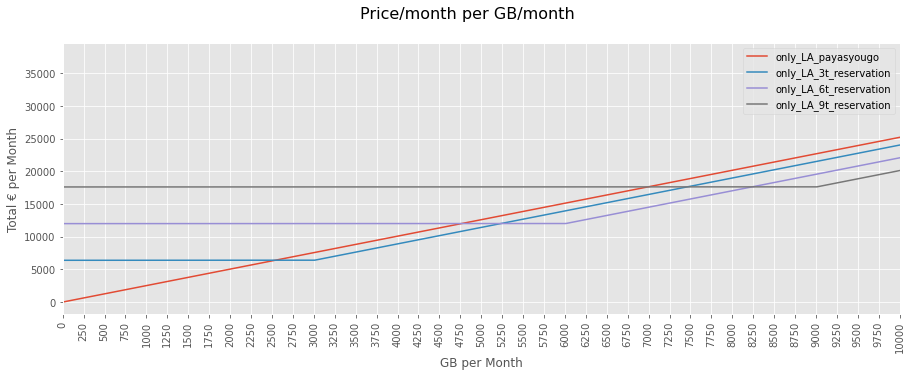

In [13]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))

fig.suptitle('Price/month per GB/month', fontsize=16)

df.plot(ax=ax,x='GB',y=['only_LA_payasyougo',
                         'only_LA_3t_reservation',
                         'only_LA_6t_reservation',
                         'only_LA_9t_reservation' ])

ax.set_xticks(np.arange(0, 10000+250, 250))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_xlim(0,10000)
ax.set_ylabel("Total € per Month")
ax.set_xlabel("GB per Month")

plt.show()

# What are the intersection points for LogAnalytics? 

In [14]:
df['LA_payasyougo_MIN_LA_3t']=abs(df['only_LA_payasyougo']- df['only_LA_3t_reservation'])
df['LA_3t_MIN_LA_6t']=abs(df['only_LA_3t_reservation']- df['only_LA_6t_reservation'])
df['LA_6t_MIN_LA_9t']=abs(df['only_LA_6t_reservation']- df['only_LA_9t_reservation'])

gb_month_LA_3t = df[df['LA_payasyougo_MIN_LA_3t'] == df['LA_payasyougo_MIN_LA_3t'].min()]['GB'].values[0]
gb_month_LA_6t = df[df['LA_3t_MIN_LA_6t'] == df['LA_3t_MIN_LA_6t'].min()]['GB'].values[0]
gb_month_LA_9t = df[df['LA_6t_MIN_LA_9t'] == df['LA_6t_MIN_LA_9t'].min()]['GB'].values[0]

print("The intersection points for LogAnalytics are:",
      gb_month_LA_3t,",",
      gb_month_LA_6t,"and",
      gb_month_LA_9t,"GB/month")

The intersection points for LogAnalytics are: 2536 , 5231 and 8231 GB/month


# Total minimum price (between pay as you go and reservation) given a GB

In [15]:
df['min_price_azurecalculator'] = df[['azurecalculator_payasyougo','azurecalculator_3t_reservation','azurecalculator_6t_reservation','azurecalculator_9t_reservation']].min(axis=1)

In [16]:
df['min_price_sentinel'] = df[['only_sentinel_payasyougo','only_sentinel_3t_reservation','only_sentinel_6t_reservation','only_sentinel_9t_reservation','only_sentinel_12t_reservation']].min(axis=1)

In [17]:
df['min_price_LA'] = df[['only_LA_payasyougo','only_LA_3t_reservation','only_LA_6t_reservation','only_LA_9t_reservation','only_LA_12t_reservation']].min(axis=1)

In [18]:
df['sum_min_prices'] = (df['min_price_sentinel'] + df['min_price_LA'])

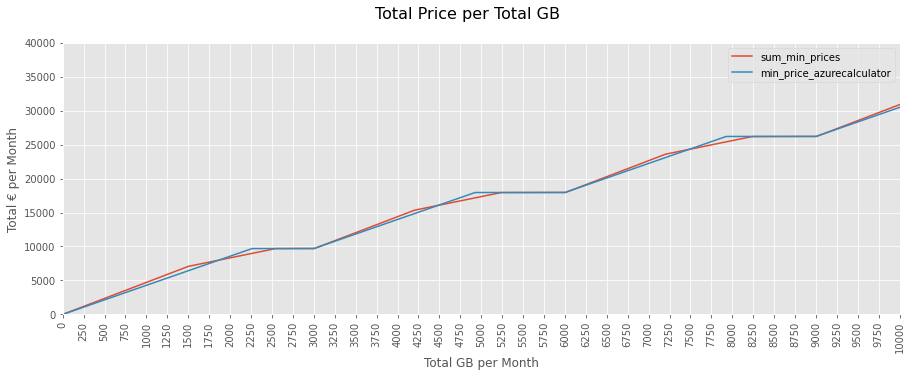

In [19]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))

fig.suptitle('Total Price per Total GB', fontsize=16)

df.plot(ax=ax,x='GB', y=['sum_min_prices','min_price_azurecalculator'])


ax.set_xticks(np.arange(0, 13000+250, 250))
ax.set_xticklabels(ax.get_xticks(),rotation=90)

ax.set_ylim(0,40000)
ax.set_xlim(0,10000)

ax.set_ylabel("Total € per Month")
ax.set_xlabel("Total GB per Month")

plt.show()

# Unit GB price of the cheapest reservation model

In [20]:
df['sum_min_prices_per_giga'] = round((df['min_price_sentinel'] + df['min_price_LA'])/df['GB'],4)

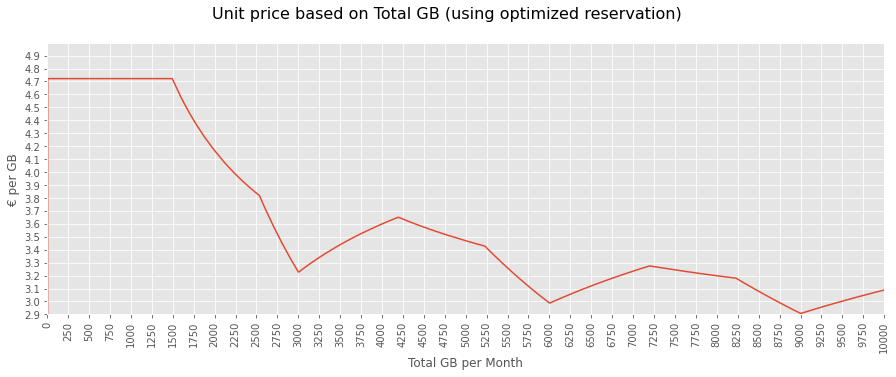

In [21]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))


fig.suptitle('Unit price based on Total GB (using optimized reservation)  ', fontsize=16)

df['sum_min_prices_per_giga'].plot(ax=ax)

ax.set_xticklabels("")
ax.set_xlim(0,10000)
ax.set_ylabel("€ per GB")
ax.set_xlabel("Total GB per Month")
ax.set_xticks(np.arange(0, 10000+250, 250))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_yticks(np.arange(2.9, 5, 0.1))
ax.set_ylim(2.9,5)
plt.show()

# All graphs together

In [22]:
df['azurecalculator_payasyougo'] = df['GB'] * price_payasyougo
df['azurecalculator_3t_reservation'] = df['GB'].apply(lambda x: price_3t_reservation*3000 if x<=3000 else (price_3t_reservation*3000) + (x-3000)* price_payasyougo)
df['azurecalculator_6t_reservation'] = df['GB'].apply(lambda x: price_6t_reservation*6000 if x<=6000 else (price_6t_reservation*6000) + (x-6000)* price_payasyougo)
df['azurecalculator_9t_reservation'] = df['GB'].apply(lambda x: price_9t_reservation*9000 if x<=9000 else (price_9t_reservation*9000) + (x-9000)* price_payasyougo)

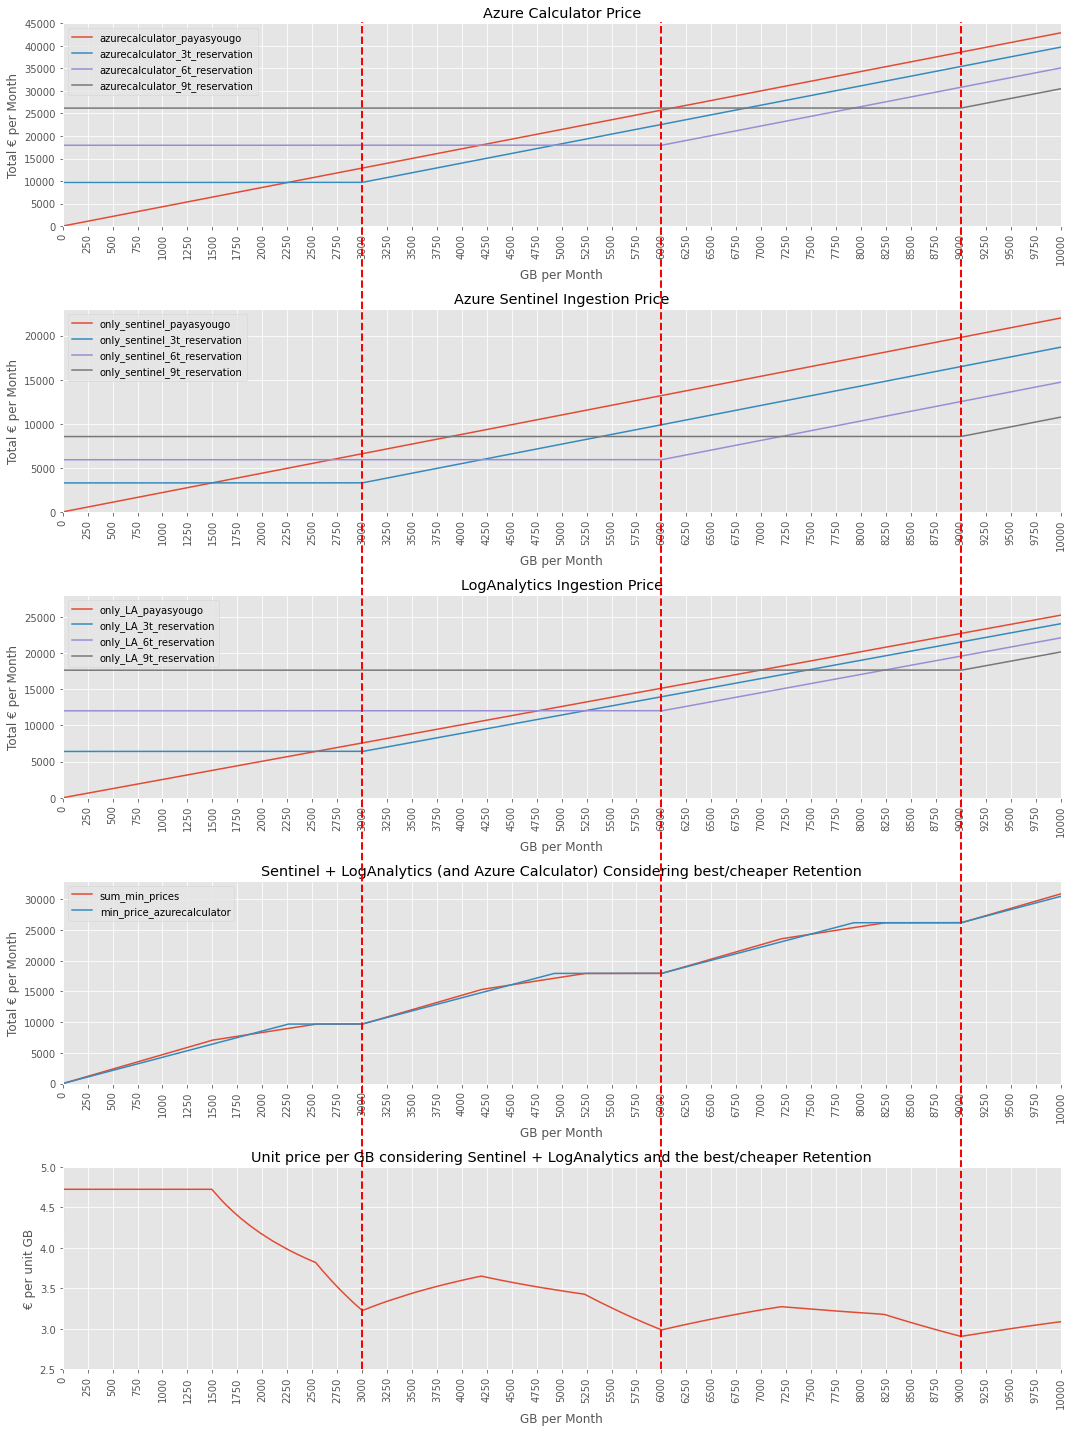

In [23]:
fig = plt.figure(figsize=(15, 20))
ax = plt.subplot2grid((5,1), (0,0))
ax1 = plt.subplot2grid((5,1), (1,0))
ax2 = plt.subplot2grid((5,1), (2,0))
ax3 = plt.subplot2grid((5,1), (3,0))
ax4 = plt.subplot2grid((5,1), (4,0))


# fig.suptitle('Price/month per GB/month', fontsize=16)

ax.set_title('Azure Calculator Price')
df.plot(ax=ax,x='GB',y=['azurecalculator_payasyougo',
                        'azurecalculator_3t_reservation',
                        'azurecalculator_6t_reservation',
                        'azurecalculator_9t_reservation'])

ax1.set_title('Azure Sentinel Ingestion Price')
df.plot(ax=ax1,x='GB',y=['only_sentinel_payasyougo',
                        'only_sentinel_3t_reservation',
                        'only_sentinel_6t_reservation',
                        'only_sentinel_9t_reservation'])

ax2.set_title('LogAnalytics Ingestion Price')
df.plot(ax=ax2,x='GB',y=['only_LA_payasyougo',
                         'only_LA_3t_reservation',
                         'only_LA_6t_reservation',
                         'only_LA_9t_reservation' ])

ax3.set_title('Sentinel + LogAnalytics (and Azure Calculator) Considering best/cheaper Retention')
df.plot(ax=ax3,x='GB', y=['sum_min_prices','min_price_azurecalculator'])

ax4.set_title('Unit price per GB considering Sentinel + LogAnalytics and the best/cheaper Retention')
df['sum_min_prices_per_giga'].plot(ax=ax4)


ax.set_xticks(np.arange(0, 10000+250, 250))
ax1.set_xticks(np.arange(0, 10000+250, 250))
ax2.set_xticks(np.arange(0, 10000+250, 250))
ax3.set_xticks(np.arange(0, 10000+250, 250))
ax4.set_xticks(np.arange(0, 10000+250, 250))

ax.set_xticklabels(ax1.get_xticks(),rotation=90)
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
ax2.set_xticklabels(ax1.get_xticks(),rotation=90)
ax3.set_xticklabels(ax1.get_xticks(),rotation=90)
ax4.set_xticklabels(ax1.get_xticks(),rotation=90)

ax.set_xlim(0,10000)
ax1.set_xlim(0,10000)
ax2.set_xlim(0,10000)
ax3.set_xlim(0,10000)
ax4.set_xlim(0,10000)

ax.set_ylim(0,45000)
ax1.set_ylim(0,23000)
ax2.set_ylim(0,28000)
ax3.set_ylim(0,33000)
ax4.set_ylim(2.5,5)

ax.set_ylabel("Total € per Month")
ax1.set_ylabel("Total € per Month")
ax2.set_ylabel("Total € per Month")
ax3.set_ylabel("Total € per Month")
ax4.set_ylabel("€ per unit GB")

ax.set_xlabel("GB per Month")
ax1.set_xlabel("GB per Month")
ax2.set_xlabel("GB per Month")
ax3.set_xlabel("GB per Month")
ax4.set_xlabel("GB per Month")

ax4.axvline(x=3000, ymin=0, ymax=6.65,ls='--',c='r', lw=2, zorder=2, clip_on=False)
ax4.axvline(x=6000, ymin=0, ymax=6.65,ls='--',c='r', lw=2, zorder=2, clip_on=False)
ax4.axvline(x=9000, ymin=0, ymax=6.65,ls='--',c='r', lw=2, zorder=2, clip_on=False)

fig.tight_layout()
plt.show()

# Plot twist: Azure Calculator is SOMEHOW CORRECT! or we don't have the precise data.
- Our hypotesis it that could be error due to approximation of values. For example, in Azure Sentinel price, the payasyougo ingestion is **€2,20** but a printscreen of an actual invoice shows that the charged price was **€2,1926**.

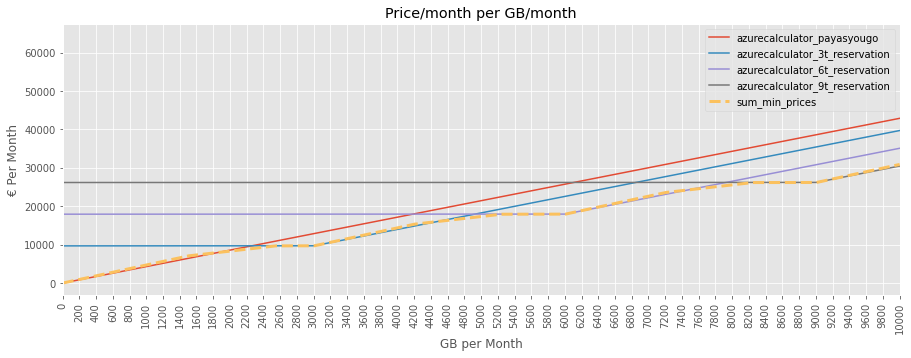

In [24]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_title('Price/month per GB/month')

df.plot(ax=ax,x='GB',y=['azurecalculator_payasyougo',
                        'azurecalculator_3t_reservation',
                        'azurecalculator_6t_reservation',
                        'azurecalculator_9t_reservation'])
df.plot(ax=ax,ls='--',lw=3,x='GB',y='sum_min_prices')

plt.xticks(np.arange(0, max(df['GB'])+200, 200),rotation='vertical')
ax.set_xlim(0,10000)
ax.set_ylabel("€ Per Month")
ax.set_xlabel("GB per Month")

plt.show()

# What is the difference between Azure Calculator and (Azure Sentinel + LA)?

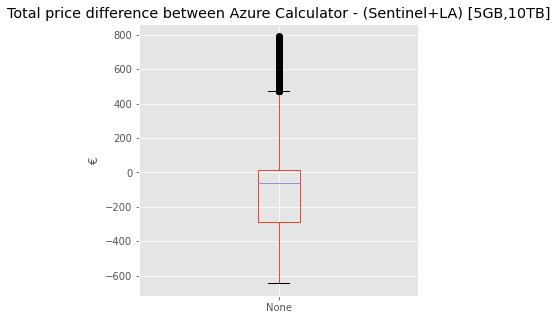

In [28]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_title('Total price difference between Azure Calculator - (Sentinel+LA) [5GB,10TB]')

(df['min_price_azurecalculator']-df['sum_min_prices'])[6:10000].plot(kind='box',ax=ax)

ax.set_ylabel("€")
ax.set_xlabel("")

plt.show()

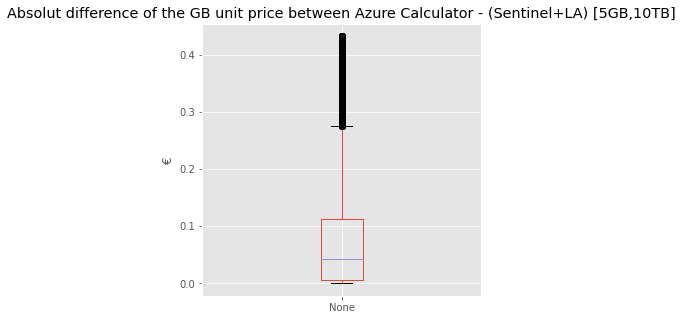

In [32]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_title('Absolut difference of the GB unit price between Azure Calculator - (Sentinel+LA) [6GB,10TB]')

abs((df['min_price_azurecalculator']-df['sum_min_prices'])/df['GB'])[6:10000].plot(kind='box',ax=ax)

ax.set_ylabel("€")
ax.set_xlabel("")

plt.show()